# **Tugas 2**

**Dhiya Salma Salsabila/24923304**

**Muhammad Nauval Ar-Rauf/10222035**


### **1. Model Fisik/Batas Dinding**
Domain didefinisikan oleh empat segmen garis, yang merupakan bagian dari empat bidang tak terbatas dalam 2D:
- $x = x_{min}$ (Dinding Kiri)
- $x = x_{max}$ (Dinding Kanan)
- $y = y_{min}$ (Dinding Bawah)
- $y = y_{max}$ (Dinding Atas)

### **2. Pendefinisian Vektor**
Setiap dinding harus memiliki vektor $\vec{N}$ yang menunjuk keluar dari domain simulasi. Sebagai contoh, dinding pada $x = x_{max}$ memiliki vektor yang menunjuk ke arah +x, yaitu $\vec{N} = (1, 0)$.

### **3. Kebocoran Pada Dinding**
Kita mendefinisikan celah sebagai sub-segmen pada salah satu dinding. Sebagai contoh:
- ID Dinding Celah: Dinding Kanan (pada $x = x_{max}$)
- Rentang Celah: $y \in [y_{celah\_min}, y_{celah\_max}]$

Parameter Geometri dan Vektor dari Domain Simulasi, Tabel berikut mencangkup parameter yang diperlukan untuk simulasi.


| Deskripsi  |  Simbol |Persamaan/Nilai|Vektor Normal Keluar (N)|
|----------- |---------|---------------|------------------------|
|Dinding Kiri|   Wkiri |x=xmin​         |N=(−1,0)|
|Dinding Kanan|Wkanan  ​|x=xmax​         |N=(1,0)|
|Dinding Bawah|Wbawah  ​|y=ymin         ​|N=(0,−1)|
|Dinding Atas|Watas​    |y=ymax​         |N=(0,1)|

### **4. Inisialisasi Partikel dan Status**

A. Definisi Vektor Status Partikel

Pada setiap waktu $t$, status partikel $S$ didefinisikan oleh dua vektor:
- Posisi: $\vec{p} = (x, y)$
- Arah: $\vec{d} = (d_x, d_y)$, di mana $||\vec{d}|| = 1$

B. Pengambilan Sampel (Sampling) Posisi Awal $\vec{p}_0$

Setiap partikel Monte Carlo $i$ harus dimulai dari posisi $\vec{p}_{0,i}$. Dalam kasus umum (sumber terdistribusi), posisi ini diambil secara seragam dari seluruh area di dalam kotak. Ini memerlukan dua bilangan acak ($\xi_2, \xi_3$) yang diambil dari distribusi seragam $U(0, 1)$:
- $x_0 = x_{min} + \xi_2 \cdot (x_{max} - x_{min})$
- $y_0 = y_{min} + \xi_3 \cdot (y_{max} - y_{min})$

C. Arah Isotropik $\vec{d}_0$

Rumus untuk Arah Isotropik:
1. Hasilkan satu bilangan acak $\xi_1$ dari distribusi seragam $U(0, 1)$.
2. Hitung sudut dalam radian: $\theta = 2\pi \cdot \xi_1$.
3. Hitung komponen vektor arah unit $\vec{d}_0$:
- $d_x = \cos(\theta)$
- $d_y = \sin(\theta)$

Vektor $\vec{d}_0 = (d_x, d_y)$ yang dihasilkan isotropik dan dinormalisasi ($||\vec{d}_0|| = 1$).

### **5. Algoritma Transport Partikel**
Kami menggunakan algoritma transport berbasis peristiwa (event-based transport), yang biasa digunakan dalam ray tracing.

Dalam metode ini, menyelesaikan untuk jarak $t$ ke tumbukan berikutnya. Simulasi melompat dari peristiwa tumbukan ke peristiwa tumbukan berikutnya.

Nasib partikel ditentukan oleh salah satu dari dua kondisi penghentian:
- "LOLOS" (ESCAPE): Partikel menabrak dinding di dalam koordinat celah.
- "TERPERANGKAP" (TRAPPED): Partikel melebihi jumlah maksimum pantulan yang diizinkan, $max\_bounces$.

### **6. Perhitungan Perpotongan dan Batas**
Sinar partikel didefinisikan secara parametrik: $\vec{R}(t) = \vec{p} + t\vec{d}$, di mana $\vec{p}=(x, y)$ dan $\vec{d}=(d_x, d_y)$. Di sini, $t$ adalah jarak di sepanjang sinar. Untuk menemukan $t$ terkecil yang positif ($t > 0$) yang memotong salah satu dari empat segmen dinding.

Metode Slab di pilih untuk menghitung perpotongan partikel dengan kotak. Untuk menghitung jarak $t$ ke keempat garis tak terbatas dari dinding.

1. Hitung Jarak $t$ ke Bidang Dinding:
- $t_{kiri} = (x_{min} - x) / d_x$
- $t_{kanan} = (x_{max} - x) / d_x$
- $t_{bawah} = (y_{min} - y) / d_y$
- $t_{atas} = (y_{max} - y) / d_y$
2. Penanganan Kasus Tepi :
- Jika $d_x = 0$, sinar tersebut vertikal dan tidak akan pernah memotong dinding kiri atau kanan. Perhitungan $t_{kiri}$ akan menghasilkan pembagian dengan nol.
3. Logika Validasi (Mencari $t_{min}$):
- Inisialisasi t_min = Infinity dan wall_hit = "NONE".
- Kita sekarang harus memeriksa setiap $t$ yang dihitung. $t$ yang valid harus memenuhi dua kriteria:
    - $t$ harus positif (di depan partikel): $t > 1\text{e-}6$ (menggunakan epsilon kecil untuk stabilitas).
    - Titik perpotongan harus berada pada segmen dinding yang relevan.
4. Proses Validasi Bertahap:
- Untuk $t_{kiri}$:
  - IF t_kiri > 1e-6 AND t_kiri < t_min:
     - $y_{intersect} = y + t_{kiri} \cdot d_y$
     - IF y_intersect >= y_min AND y_intersect <= y_max:
         - t_min = t_{kiri}
         - wall_hit = "KIRI"
- Untuk $t_{kanan}$:
   - IF t_kanan > 1e-6 AND t_kanan < t_min:
       - $y_{intersect} = y + t_{kanan} \cdot d_y$
       - IF y_intersect >= y_min AND y_intersect <= y_max:
          - t_min = t_{kanan}
          - wall_hit = "KANAN"
- Untuk $t_{bawah}$:
   - IF t_bawah > 1e-6 AND t_bawah < t_min:
       - $x_{intersect} = x + t_{bawah} \cdot d_x$
      - IF x_intersect >= x_min AND x_intersect <= x_max:
          - t_min = t_{bawah}
          - wall_hit = "BAWAH"
- Untuk $t_{atas}$:
  - IF t_atas > 1e-6 AND t_atas < t_min:
     - $x_{intersect} = x + t_{atas} \cdot d_x$
     - IF x_intersect >= x_min AND x_intersect <= x_max:
        - t_min = t_{atas}
        - wall_hit = "ATAS"

Fungsi ini mengembalikan (t_min, wall_hit). $t_{min}$ akan menjadi jarak ke tumbukan terdekat yang valid.

### **7. Evaluasi Titik Tumbukkan**
Diberikan vektor arah masuk $\vec{d}$ dan vektor normal dinding $\vec{N}$ arah refleksi $\vec{d}_{new}$ dihitung sebagai berikut:

1. Hitung proyeksi skalar dari $\vec{d}$ ke $\vec{N}$. Ini adalah dot product.$p = \vec{d} \cdot \vec{N} = (d_x \cdot N_x) + (d_y \cdot N_y)$
2. Hitung vektor refleksi $\vec{d}_{new}$.$\vec{d}_{new} = \vec{d} - 2 \cdot p \cdot \vec{N}$
3. Uraikan menjadi komponen untuk implementasi kode:$d_{new, x} = d_x - 2 \cdot p \cdot N_x$$d_{new, y} = d_y - 2 \cdot p \cdot N_y$

### **8. Simulasi Monte Carlo**
1. Menghitung probabilitas kebocoran $P_{escape} = \frac{N_{escape}}{N_{particles}}$
2. Menghitung probabilitas terperangkap $P_{trapped} = \frac{N_{trapped}}{N_{particles}}$

### **Ringkasan Algoritma**
1. Definisi Geometri : Mendefinisikan kotak dan vektor $\vec{N}$.
2. Inisialisasi Posisi $\vec{p}_0$: Mengambil sampel $U(x_{min}, x_{max}), U(y_{min}, y_{max})$.
3. Inisialisasi Arah $\vec{d}_0$: Menggunakan $\theta = 2\pi \cdot \xi_1$ untuk isotropi.
4. Transport Partikel: Mengadopsi pelacakan berbasis peristiwa (ray tracing) untuk menghindari tunneling.
5. Perhitungan Perpotongan: Menggunakan metode Slab ($t = (x_{wall} - x) / d_x$) yang divalidasi. Serta evaluasi titik tumbukkan: Menerapkan IF wall_hit == ID_CELAH AND $y_i \in [y_{celah\_min}, y_{celah\_max}]$ THEN ESCAPE.
7. Evaluasi titik tumbukkan, menerapkan rumus vektor $\vec{d}_{new} = \vec{d} - 2(\vec{d}\cdot\vec{N})\vec{N}$ untuk lenting sempurna.
8. Monte Carlo: Mengumpulkan statistik $P_{escape} = N_{escaped} / N_{particles}$.


Memulai Simulasi Monte Carlo...
Jumlah partikel: 20000
Batas pantulan: 100
Definisi Kotak: x dari 0.0 ke 1.0, y dari 0.0 ke 1.0
Definisi Celah: Dinding 'KANAN' dari y=0.4 ke y=0.6
------------------------------------------------------------
...Progress: 10% selesai
...Progress: 20% selesai
...Progress: 30% selesai
...Progress: 40% selesai
...Progress: 50% selesai
...Progress: 60% selesai
...Progress: 70% selesai
...Progress: 80% selesai
...Progress: 90% selesai
...Progress: 100% selesai
------------------------------------------------------------
Simulasi Selesai.
Waktu eksekusi: 6.05 detik
Partikel lolos: 18112
Partikel terperangkap: 1888
Probabilitas Lolos (P_escape): 0.9056


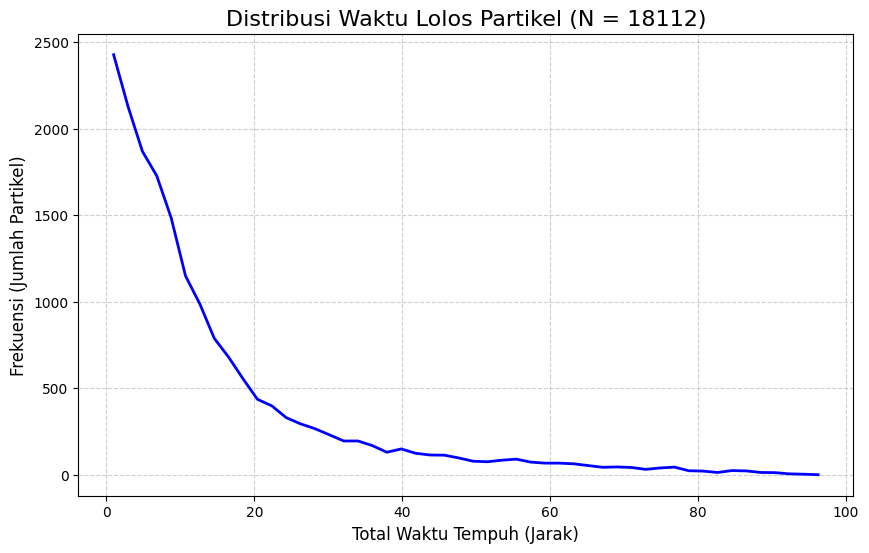

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time as stopwatch

# 1. PENGATURAN BATAS FISIK
BOX_MIN = np.array([0.0, 0.0])
BOX_MAX = np.array([1.0, 1.0])

GAP_WALL_ID = 'KANAN'
GAP_Y_MIN = 0.4
GAP_Y_MAX = 0.6

# 2. PARAMETER SIMULASI MONTE CARLO
N_PARTICLES = 20000
MAX_BOUNCES = 100
EPSILON = 1e-9

# 3. FUNGSI INISIALISASI PARTIKEL
def sample_start_position():
    x = random.uniform(BOX_MIN[0], BOX_MAX[0])
    y = random.uniform(BOX_MIN[1], BOX_MAX[1])
    return np.array([x, y])

def sample_isotropic_direction():
    theta = random.uniform(0, 2.0 * np.pi)
    return np.array([np.cos(theta), np.sin(theta)])

# 4. ALGORITMA PELACAKAN
def find_closest_intersection(pos, dir):
    t_min = float('inf')
    wall_hit = None

    if abs(dir[0]) > EPSILON:
        t_kiri = (BOX_MIN[0] - pos[0]) / dir[0]
        if t_kiri > EPSILON:
            y_intersect = pos[1] + t_kiri * dir[1]
            if BOX_MIN[1] <= y_intersect <= BOX_MAX[1]:
                t_min = t_kiri
                wall_hit = 'KIRI'

        t_kanan = (BOX_MAX[0] - pos[0]) / dir[0]
        if t_kanan > EPSILON:
            y_intersect = pos[1] + t_kanan * dir[1]
            if BOX_MIN[1] <= y_intersect <= BOX_MAX[1] and t_kanan < t_min:
                t_min = t_kanan
                wall_hit = 'KANAN'

    if abs(dir[1]) > EPSILON:
        t_bawah = (BOX_MIN[1] - pos[1]) / dir[1]
        if t_bawah > EPSILON:
            x_intersect = pos[0] + t_bawah * dir[0]
            if BOX_MIN[0] <= x_intersect <= BOX_MAX[0] and t_bawah < t_min:
                t_min = t_bawah
                wall_hit = 'BAWAH'

        t_atas = (BOX_MAX[1] - pos[1]) / dir[1]
        if t_atas > EPSILON:
            x_intersect = pos[0] + t_atas * dir[0]
            if BOX_MIN[0] <= x_intersect <= BOX_MAX[0] and t_atas < t_min:
                t_min = t_atas
                wall_hit = 'ATAS'

    return t_min, wall_hit

def trace_particle(p_start, d_start):
    p_current = p_start.copy()
    d_current = d_start.copy()
    total_time = 0.0

    for _ in range(MAX_BOUNCES):
        t_intersect, wall_hit = find_closest_intersection(p_current, d_current)

        if wall_hit is None:
            return "ERROR", total_time

        total_time += t_intersect
        p_intersect = p_current + (t_intersect - EPSILON) * d_current

        if wall_hit == GAP_WALL_ID and GAP_Y_MIN <= p_intersect[1] <= GAP_Y_MAX:
            return "ESCAPED", total_time

        if wall_hit in ['KIRI', 'KANAN']:
            d_current[0] = -d_current[0]
        else:
            d_current[1] = -d_current[1]

        p_current = p_intersect + d_current * (2 * EPSILON)

    return "TRAPPED", total_time

# 5. FUNGSI UTAMA
def run_simulation():
    print("Memulai Simulasi Monte Carlo...")
    print(f"Jumlah partikel: {N_PARTICLES}")
    print(f"Batas pantulan: {MAX_BOUNCES}")
    print(f"Definisi Kotak: x dari {BOX_MIN[0]} ke {BOX_MAX[0]}, y dari {BOX_MIN[1]} ke {BOX_MAX[1]}")
    print(f"Definisi Celah: Dinding '{GAP_WALL_ID}' dari y={GAP_Y_MIN} ke y={GAP_Y_MAX}")
    print("-" * 60)

    sim_start_time = stopwatch.time()
    escape_times = []
    n_escaped = 0
    n_trapped = 0

    for i in range(N_PARTICLES):
        p_start = sample_start_position()
        d_start = sample_isotropic_direction()
        status, time_taken = trace_particle(p_start, d_start)

        if status == "ESCAPED":
            n_escaped += 1
            escape_times.append(time_taken)
        elif status == "TRAPPED":
            n_trapped += 1

        if (i + 1) % (N_PARTICLES // 10) == 0:
            print(f"...Progress: {(i + 1) / N_PARTICLES * 100:.0f}% selesai")

    sim_end_time = stopwatch.time()

    print("-" * 60)
    print("Simulasi Selesai.")
    print(f"Waktu eksekusi: {sim_end_time - sim_start_time:.2f} detik")
    print(f"Partikel lolos: {n_escaped}")
    print(f"Partikel terperangkap: {n_trapped}")
    print(f"Probabilitas Lolos (P_escape): {n_escaped / N_PARTICLES:.4f}")

    if escape_times:
        counts, bins = np.histogram(escape_times, bins=50)
        bin_centers = 0.5 * (bins[:-1] + bins[1:])  # titik tengah tiap bin

        plt.figure(figsize=(10, 6))
        plt.plot(bin_centers, counts, color='blue', linewidth=2)
        plt.title(f'Distribusi Waktu Lolos Partikel (N = {n_escaped})', fontsize=16)
        plt.xlabel('Total Waktu Tempuh (Jarak)', fontsize=12)
        plt.ylabel('Frekuensi (Jumlah Partikel)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("\nTidak ada partikel yang berhasil lolos untuk dibuat grafiknya.")

# EKSEKUSI
if __name__ == "__main__":
    run_simulation()
